# AUTONORMALIZE DEMO 
Using Autonormalize to normalize a kaggle dataset about food purchasing.

In [1]:
import os

import pandas as pd
import autonormalize as an

In [2]:
food_df = pd.read_csv(os.path.join(os.getcwd(), 'autonormalize/downloads/food.csv'), encoding='latin1')
food_df = food_df.drop(columns=food_df.columns[10:])

In [3]:
entityset = an.auto_entityset(food_df, name='Foods')

100%|██████████| 10/10 [00:05<00:00,  1.55it/s]


In [4]:
entityset

Entityset: Foods
  Entities:
    Item Code_Element Code_Area Code [Rows: 21477, Columns: 4]
    Element Code [Rows: 2, Columns: 2]
    Item Code [Rows: 117, Columns: 2]
    Area Code [Rows: 174, Columns: 5]
    Area Abbreviation [Rows: 169, Columns: 2]
  Relationships:
    Item Code_Element Code_Area Code.Area Code -> Area Code.Area Code
    Item Code_Element Code_Area Code.Item Code -> Item Code.Item Code
    Item Code_Element Code_Area Code.Element Code -> Element Code.Element Code
    Area Code.Area Abbreviation -> Area Abbreviation.Area Abbreviation

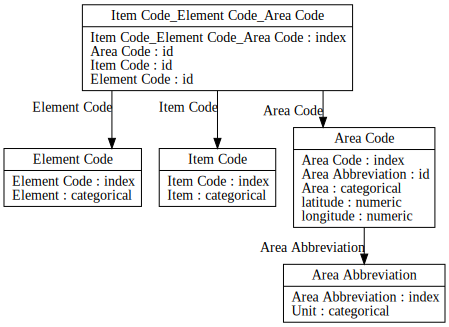

In [5]:
entityset.plot()

In [6]:
import featuretools as ft
fm, features = ft.dfs(entityset=entityset, target_entity='Area Code_Element_Item Code')
features

KeyError: 'Provided target entity Area Code_Element_Item Code does not exist in Foods'